In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset.csv")
adf = df['Age']
adf1 = df[['Age', 'Sex']]
hdf_h = df['Height'].sample(n = 1000)
wdf_h = df['Weight'].sample(n = 1000)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
ID        10000 non-null int64
Name      10000 non-null object
Sex       10000 non-null object
Age       9660 non-null float64
Height    7797 non-null float64
Weight    7713 non-null float64
Team      10000 non-null object
NOC       10000 non-null object
Year      10000 non-null int64
City      8994 non-null object
Sport     10000 non-null object
Medal     10000 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 937.6+ KB
None


In [4]:
#Basic look at the dataset
print(df.describe())

                  ID          Age       Height       Weight          Year
count   10000.000000  9660.000000  7797.000000  7713.000000  10000.000000
mean    67968.969300    25.525466   175.293318    70.668611   1978.499000
std     38970.867127     6.286535    10.565308    14.422165     29.747106
min        33.000000    11.000000   130.000000    28.000000   1896.000000
25%     34181.500000    21.000000   168.000000    60.000000   1960.000000
50%     67883.000000    25.000000   175.000000    70.000000   1988.000000
75%    101330.750000    28.000000   183.000000    79.000000   2004.000000
max    135558.000000    73.000000   217.000000   176.500000   2016.000000


In [5]:
#Checking for columns containing NaN/missing values 
df.apply(lambda x:sum(x.isnull()), axis = 0)

ID           0
Name         0
Sex          0
Age        340
Height    2203
Weight    2287
Team         0
NOC          0
Year         0
City      1006
Sport        0
Medal        0
dtype: int64

In [6]:
#Columns Age, Height, Weight and City contain NaN values. 
#Replacing NaN values with the average of the column for all numeric data.
#df['Age'] = df['Age'].fillna(df['Age'].mean())
#df['Height'] = df['Height'].fillna(df['Height'].mean())
#df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [7]:
#Replacing NaN values in City(categorical column) with previous values.
df['City'].fillna(method = 'ffill', inplace = True)

In [8]:
#Interpolation of immediate data before and after missing/NaN values.
df = df.interpolate(method = 'slinear', order = 3)

In [9]:
#Normalisation of all numeric columns such that mean is 0 and variance is 1
#Normalisation is important as it removes any bias in the data and to provide an uniform scale for all the features.
#Here, we've gone for z-score normalisation for all numeric categories
mean_w, std_w = df["Weight"].mean(), df["Weight"].std()
mean_h, std_h = df['Height'].mean(), df['Height'].std()
df['Weight'] = (df['Weight'] - df["Weight"].mean()) / df['Weight'].std()
df['Height'] = (df['Height'] - df["Height"].mean()) / df['Height'].std()
df['Age'] = (df['Age'] - df["Age"].mean()) / df['Age'].std()

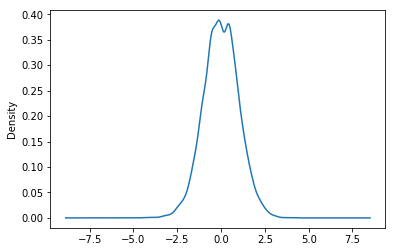

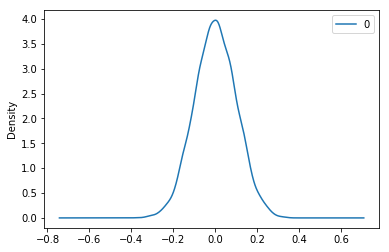

In [10]:
hdf = df['Height'].plot(kind = 'kde', stacked = False)
plt.show()

sampleMeans = []
for _ in range(10000):
    samples = df['Height'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)

ax = pd.DataFrame(sampleMeans).plot(kind = 'kde', stacked = False)
plt.show()

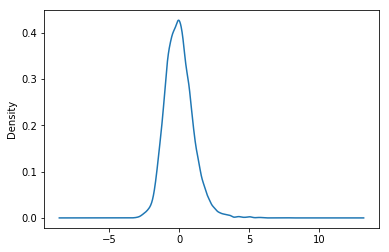

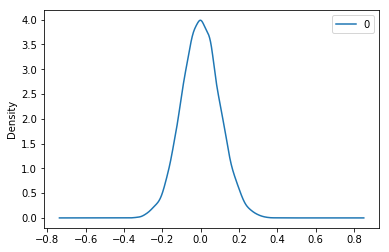

In [11]:
wdf = df['Weight'].plot(kind = 'kde', stacked = False)
plt.show()

sampleMeans = []
for _ in range(10000):
    samples = df['Weight'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)

ax = pd.DataFrame(sampleMeans).plot(kind = 'kde', stacked = False)
plt.show()

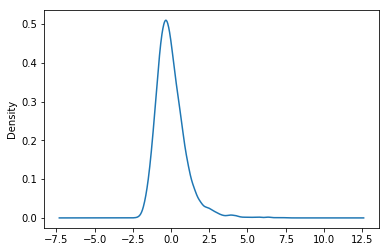

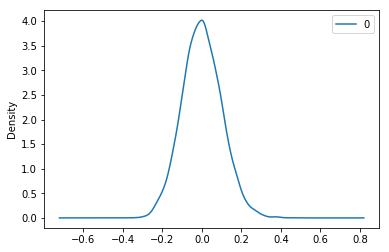

In [12]:
hdf = df['Age'].plot(kind = 'kde', stacked = False)
plt.show()

sampleMeans = []
for _ in range(10000):
    samples = df['Age'].sample(n=100)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)

ax = pd.DataFrame(sampleMeans).plot(kind = 'kde', stacked = False)
plt.show()

In [13]:
#It can be observed that most of the data somewhat seems normal, but the smoothness of the bell-curve can be increased by
#applying the CLT.

Text(0.5,1,'Top medal winning countries')

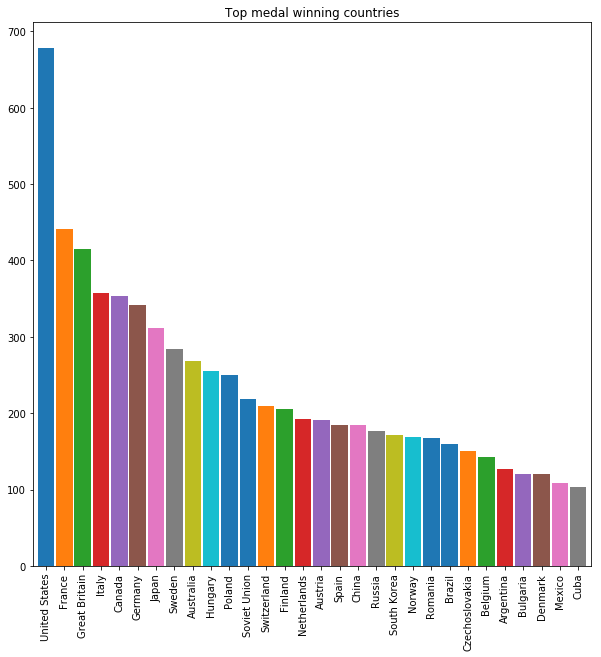

In [14]:
#Graph visualisation techniques
#df1 = df['Team'].sample(n = 1000)

counts = df['Team'].value_counts()
counts = counts[counts>100]
high_freq_df = df[df['Team'].isin(counts.index)]

fig, ax = plt.subplots()
high_freq_df['Team'].value_counts().plot(ax = ax, kind = 'bar', width = 0.9, figsize = (10,10))
plt.title('Top medal winning countries')

Text(0.5,1,'Top medal winning countries')

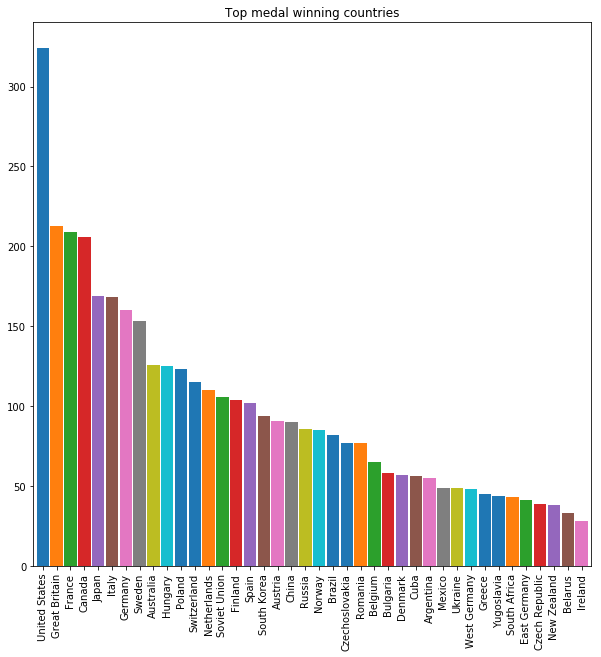

In [15]:
df1 = df.sample(n = 5000)
counts = df1['Team'].value_counts()
counts = counts[counts>25]
high_freq_df = df1[df1['Team'].isin(counts.index)]

fig, ax = plt.subplots()
high_freq_df['Team'].value_counts().plot(ax = ax, kind = 'bar', width = 0.9, figsize = (10,10))
plt.title('Top medal winning countries')

In [16]:
tsy = df1.groupby(['Team','Sex']).size()
tsy = tsy[tsy > 20]

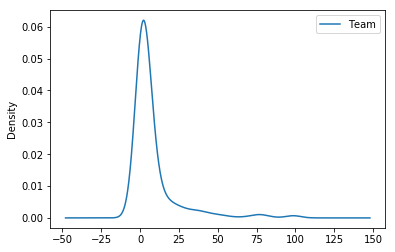

In [17]:
noOfMedals = pd.DataFrame(df['Team'].value_counts())
noOfMedals = noOfMedals[noOfMedals['Team'] < 100]
noOfMedals.plot(kind = 'kde', stacked = False)

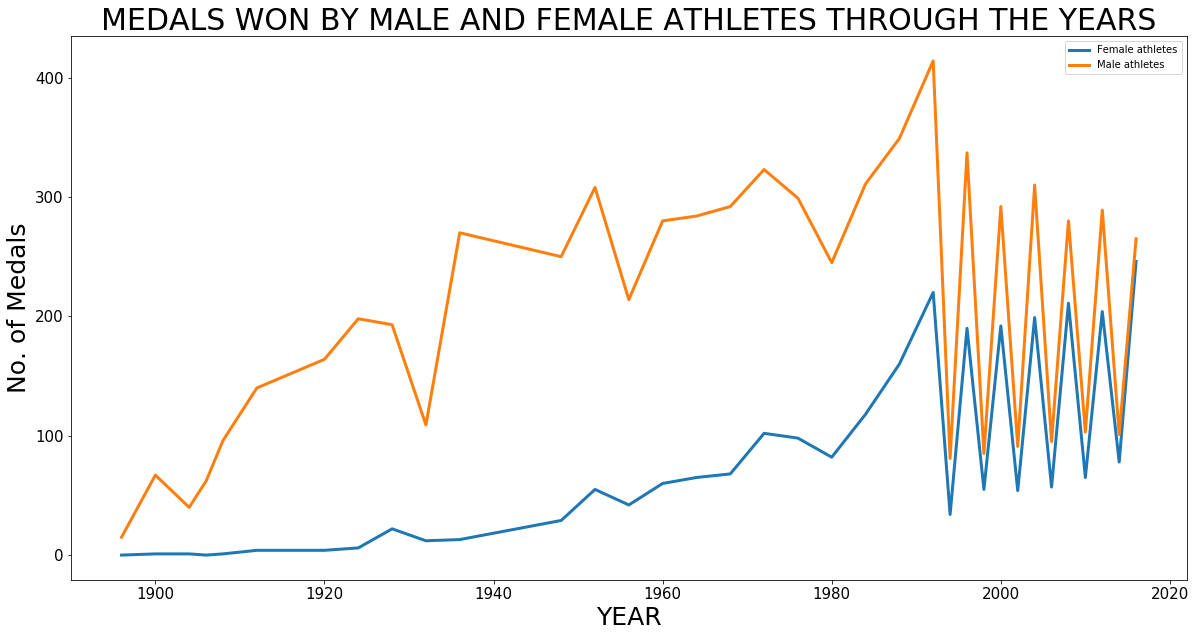

In [18]:
throughTheYears = pd.DataFrame(df.groupby(['Sex', 'Year']).size())
throughTheYears['Medals'] = throughTheYears[0]

#throughTheYears.drop([0], inplace = True)
ax = throughTheYears.unstack(0).fillna(0)
plt.figure(figsize = (20,10))
plt.plot(ax['Medals'], linewidth = 3)
plt.legend(('Female athletes', 'Male athletes'), loc = 'upper right')
plt.title('MEDALS WON BY MALE AND FEMALE ATHLETES THROUGH THE YEARS', fontsize = 30)
plt.xlabel('YEAR', fontsize = 25)
plt.ylabel('No. of Medals', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

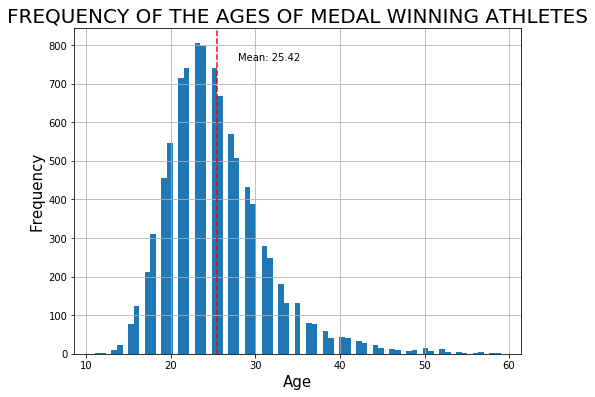

In [19]:
adf = adf[adf < 60]
plt.figure(figsize = (8, 6))
adf.hist(grid = True, bins = 'auto')
plt.title('FREQUENCY OF THE AGES OF MEDAL WINNING ATHLETES', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.axvline(adf.mean(), color = 'red', linestyle = 'dashed')
_, max_ = plt.ylim()
plt.text(adf.mean() + adf.mean()/10, max_ - max_/10,'Mean: {:.2f}'.format(adf.mean()))
plt.show()

In [20]:
adf1 = adf1.groupby(['Sex'], as_index = False)

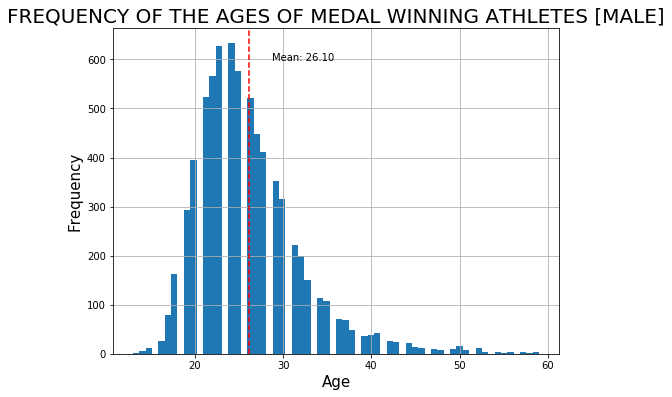

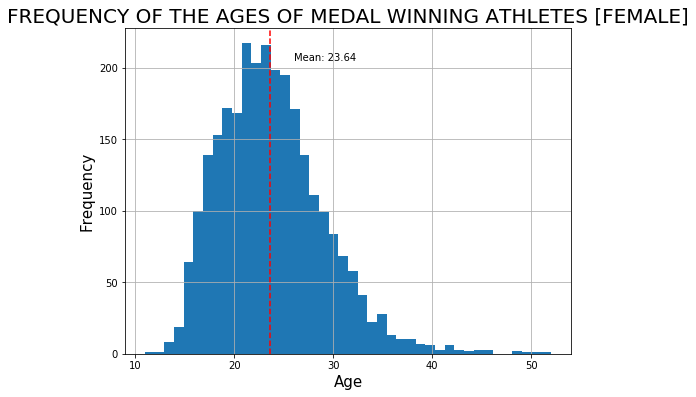

In [21]:
adf1 = adf1.fillna(method = 'ffill')
adfm = adf1[adf1['Sex'] == 'M']
adfm = adfm[adfm['Age'] != 0]
adfm = adfm[adfm['Age'] < 60]
plt.figure(figsize = (8,6))
adfm['Age'].hist(grid = True, bins = 'auto')
plt.title('FREQUENCY OF THE AGES OF MEDAL WINNING ATHLETES [MALE]', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.axvline(adfm['Age'].mean(), color = 'red', linestyle = 'dashed')
_, max_ = plt.ylim()
plt.text(adfm['Age'].mean() + adfm['Age'].mean()/10, max_ - max_/10,'Mean: {:.2f}'.format(adfm['Age'].mean()))
plt.show()
adff = adf1[adf1['Sex'] == 'F']
adff = adff[adff['Age'] != 0]
adff = adff[adff['Age'] < 60]
plt.figure(figsize = (8,6))
adff['Age'].hist(grid = True, bins = 'auto')
plt.title('FREQUENCY OF THE AGES OF MEDAL WINNING ATHLETES [FEMALE]', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.axvline(adff['Age'].mean(), color = 'red', linestyle = 'dashed')
_, max_ = plt.ylim()
plt.text(adff['Age'].mean() + adff['Age'].mean()/10, max_ - max_/10,'Mean: {:.2f}'.format(adff['Age'].mean()))
plt.show()

<Figure size 720x720 with 0 Axes>

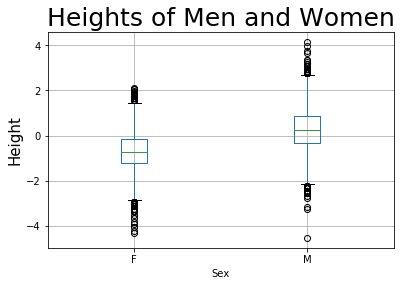

In [22]:
plt.figure(figsize = (10,10))
df.boxplot(column = 'Height', by = 'Sex')
plt.title('Heights of Men and Women', fontsize = 25)
plt.ylabel('Height', fontsize = 15)
plt.suptitle('')
plt.show()

<Figure size 720x720 with 0 Axes>

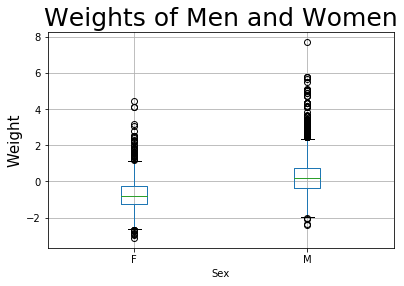

In [23]:
plt.figure(figsize = (10,10))
df.boxplot(column = 'Weight', by = 'Sex')
plt.title('Weights of Men and Women', fontsize = 25)
plt.ylabel('Weight', fontsize = 15)
plt.suptitle('')
plt.show()

In [24]:
hmdf = pd.DataFrame(df.groupby(['Medal', 'Year', 'Height']).size())
hmdf = hmdf.reset_index()
hmdf = hmdf[hmdf.Height > hmdf.Height.quantile(0.25)]
hmdf = hmdf[hmdf.Height < hmdf.Height.quantile(0.75)]

In [25]:
group_cols = ['Medal', 'Year']
observations = hmdf.groupby(group_cols)[0].sum()
total_height = hmdf.assign(total=hmdf['Height']*hmdf[0]).groupby(group_cols)['total'].sum()

res = total_height / observations
res = res.reset_index()

In [26]:
resb = res[res['Medal'] == 'Bronze']
ress = res[res['Medal'] == 'Silver']
resg = res[res['Medal'] == 'Gold']

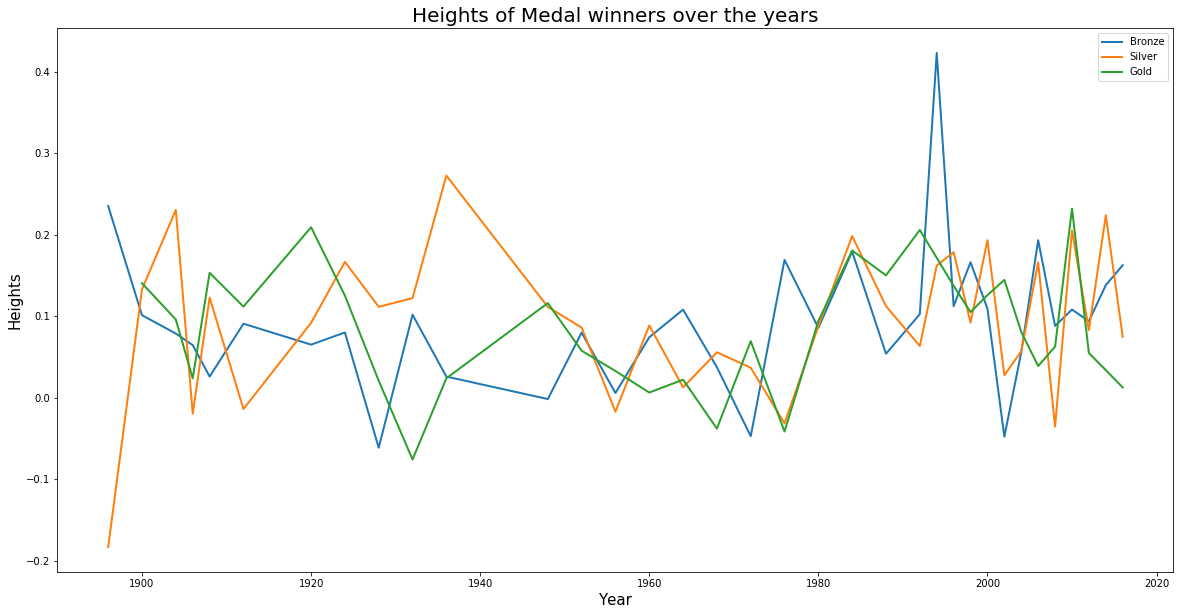

In [27]:
plt.figure(figsize = (20, 10))
plt.title('Heights of Medal winners over the years', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Heights', fontsize = 15)
plt.plot(resb['Year'], resb[0], linewidth = 2)
plt.plot(ress['Year'], ress[0], linewidth = 2)
plt.plot(resg['Year'], resg[0], linewidth = 2)
plt.legend(['Bronze', 'Silver', 'Gold'])
plt.show()

In [28]:
hmdf = pd.DataFrame(df.groupby(['Medal', 'Year', 'Weight']).size())
hmdf = hmdf.reset_index()
hmdf = hmdf[hmdf.Weight > hmdf.Weight.quantile(0.25)]
hmdf = hmdf[hmdf.Weight < hmdf.Weight.quantile(0.75)]

In [29]:
group_cols = ['Medal', 'Year']
observations = hmdf.groupby(group_cols)[0].sum()
total_height = hmdf.assign(total=hmdf['Weight']*hmdf[0]).groupby(group_cols)['total'].sum()

res = total_height / observations
res = res.reset_index()

In [30]:
resb = res[res['Medal'] == 'Bronze']
ress = res[res['Medal'] == 'Silver']
resg = res[res['Medal'] == 'Gold']

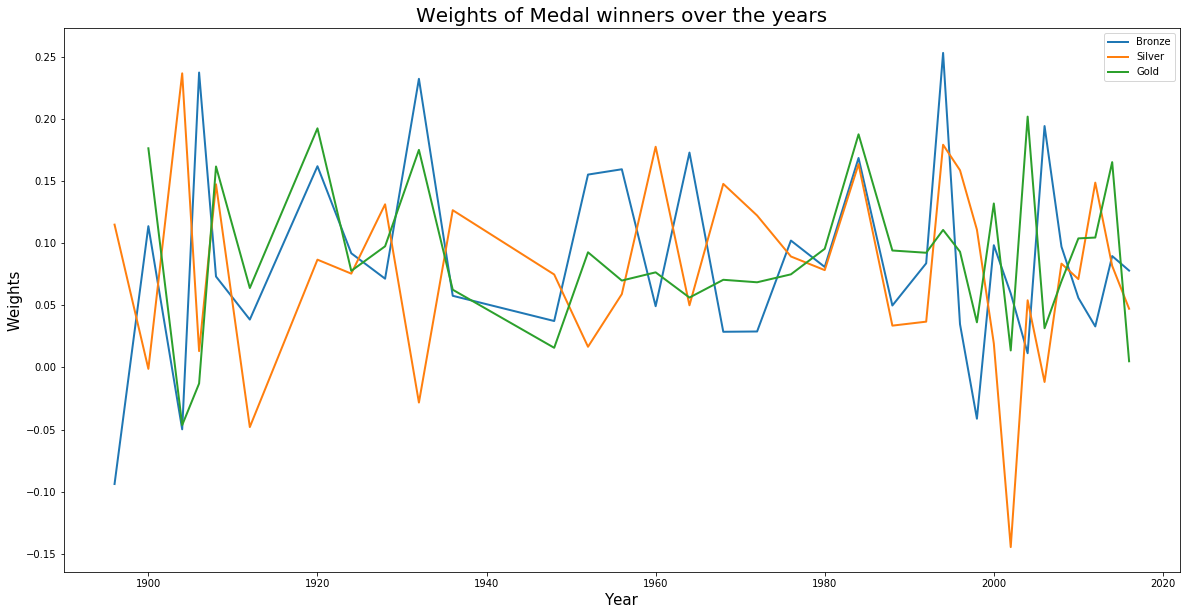

In [31]:
plt.figure(figsize = (20, 10))
plt.title('Weights of Medal winners over the years', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Weights', fontsize = 15)
plt.plot(resb['Year'], resb[0], linewidth = 2)
plt.plot(ress['Year'], ress[0], linewidth = 2)
plt.plot(resg['Year'], resg[0], linewidth = 2)
plt.legend(['Bronze', 'Silver', 'Gold'])
plt.show()

In [32]:
#H0 : Weight <= 80 for gold medallists
#H1 : Weight > 80
w_hypo = (wdf_h.mean() - 80)/wdf_h.std()
p_w = norm.cdf(w_hypo)

In [33]:
p_w

0.2639183577459253

In [34]:
#H0 : Height <= 182 for gold medallists
#H1 : Height > 182
h_hypo = (hdf_h.mean() - 182) / hdf_h.std()
p_h = norm.cdf(h_hypo)

In [35]:
p_h

0.26891228429404496

In [36]:
auto_df = df.sample(n = 10000).corr()

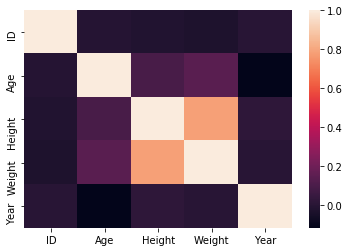

In [37]:
sns.heatmap(auto_df, xticklabels = auto_df.columns, yticklabels = auto_df.columns)